In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import pylab as pl

from sklearn.datasets.samples_generator import make_blobs

In [2]:
np.random.seed(0)

In [4]:
x, y = make_blobs(n_samples = 5000, centers = [[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]], cluster_std = 0.9)

In [8]:
x

array([[2.17849435, 3.07098024],
       [4.16732621, 4.06800392],
       [1.8465158 , 2.73924695],
       ...,
       [0.29772603, 1.24400152],
       [2.30496875, 2.70020319],
       [2.35637859, 3.63035513]])

In [9]:
y

array([1, 3, 2, ..., 0, 1, 1])

In [10]:
x.shape

(5000, 2)

In [11]:
y.shape

(5000,)

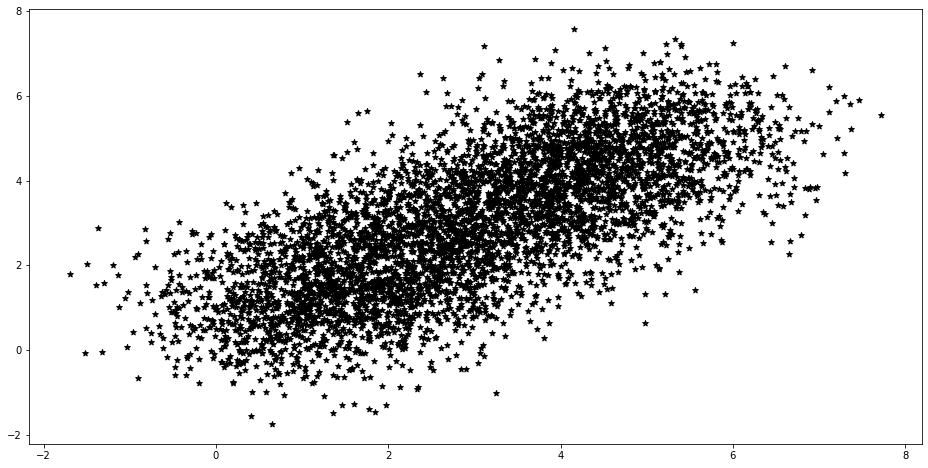

In [13]:
plt.figure(figsize = (16, 8))
plt.scatter(x[:, 0], x[:, 1], marker = '*', color = 'k')
pl.show()

In [17]:
from sklearn.cluster import KMeans
clt = KMeans(init = 'k-means++', n_clusters = 5)
clt.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
y

array([1, 3, 2, ..., 0, 1, 1])

In [23]:
predict = clt.predict(x)
predict

array([3, 0, 3, ..., 1, 3, 3])

In [31]:
k_means_labels = clt.labels_
k_means_labels

array([3, 0, 3, ..., 1, 3, 3])

In [32]:
k_means_centers = clt.cluster_centers_
k_means_centers

array([[3.97818823, 3.60282812],
       [0.69517513, 0.98970943],
       [4.99757367, 5.1548813 ],
       [2.06309361, 3.0920726 ],
       [2.53333948, 1.40583089]])

In [26]:
clt.inertia_

5026.297661746482

In [27]:
clt.n_clusters

5

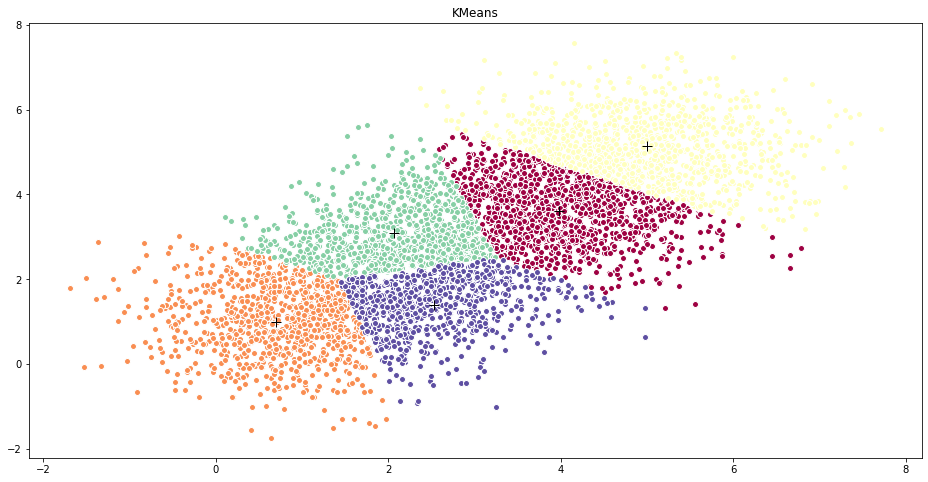

In [44]:
fig = plt.figure(figsize = (16, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])), colors):
    my_members = (k_means_labels == k)
    cluster_centers = k_means_centers[k]
    
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor = col, marker = 'o')
    ax.plot(cluster_centers[0], cluster_centers[1], '+', markerfacecolor=col,  markeredgecolor='k', markersize=10)
ax.set_title('KMeans')
plt.show()

# DBSCAN Algorithm on Blob_data

In [45]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 1, min_samples = 10)
db.fit(x)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [47]:
db.core_sample_indices_[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [48]:
db.components_

array([[2.17849435, 3.07098024],
       [4.16732621, 4.06800392],
       [1.8465158 , 2.73924695],
       ...,
       [0.29772603, 1.24400152],
       [2.30496875, 2.70020319],
       [2.35637859, 3.63035513]])

In [49]:
db.eps

1

In [50]:
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
db.min_samples

10

# Agglomerative Hierarchial Clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering
hi = AgglomerativeClustering(n_clusters = 5)
hi.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [57]:
y

array([1, 3, 2, ..., 0, 1, 1])

In [55]:
hi.labels_

array([4, 2, 4, ..., 3, 4, 2], dtype=int64)

In [56]:
hi.n_clusters

5

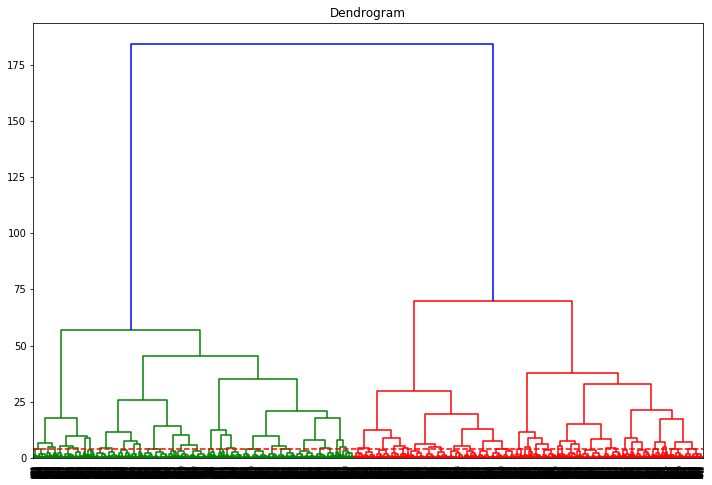

In [62]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize = (12, 8))
plt.title('Dendrogram')
dend = sc.dendrogram(sc.linkage(x, method = 'ward'))
plt.axhline(y=4, color='r', linestyle='--')